In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [29]:
df=pd.read_csv("Churn_Modelling.csv")

In [30]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [31]:
df.drop(columns=['RowNumber'],axis=1,inplace=True)

In [32]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [34]:
df.isnull().sum()

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [35]:
df.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


# EXPLORATORY DATA ANALYSIS

In [36]:
df_numeric = df.select_dtypes(include=[np.number])


<Axes: >

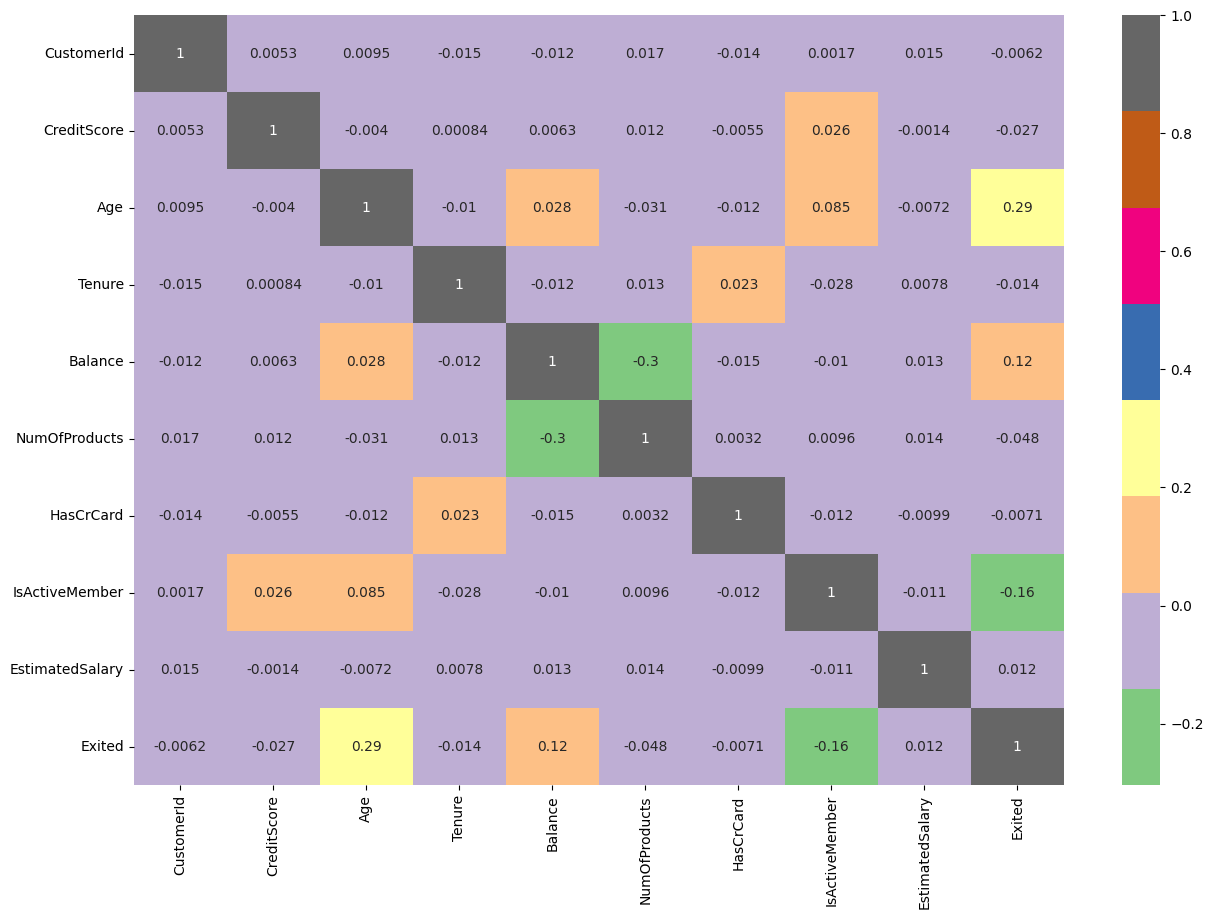

In [37]:
plt.figure(figsize=(15,10))
corr=df_numeric.corr()
sns.heatmap(corr,annot=True, cmap="Accent")

In [42]:
# we need features that are highly correlated with the output,positively or negatively 
features=corr['Exited'].sort_values(ascending=False)[1:]

In [44]:

features.index

Index(['Age', 'Balance', 'EstimatedSalary', 'CustomerId', 'HasCrCard',
       'Tenure', 'CreditScore', 'NumOfProducts', 'IsActiveMember'],
      dtype='object')

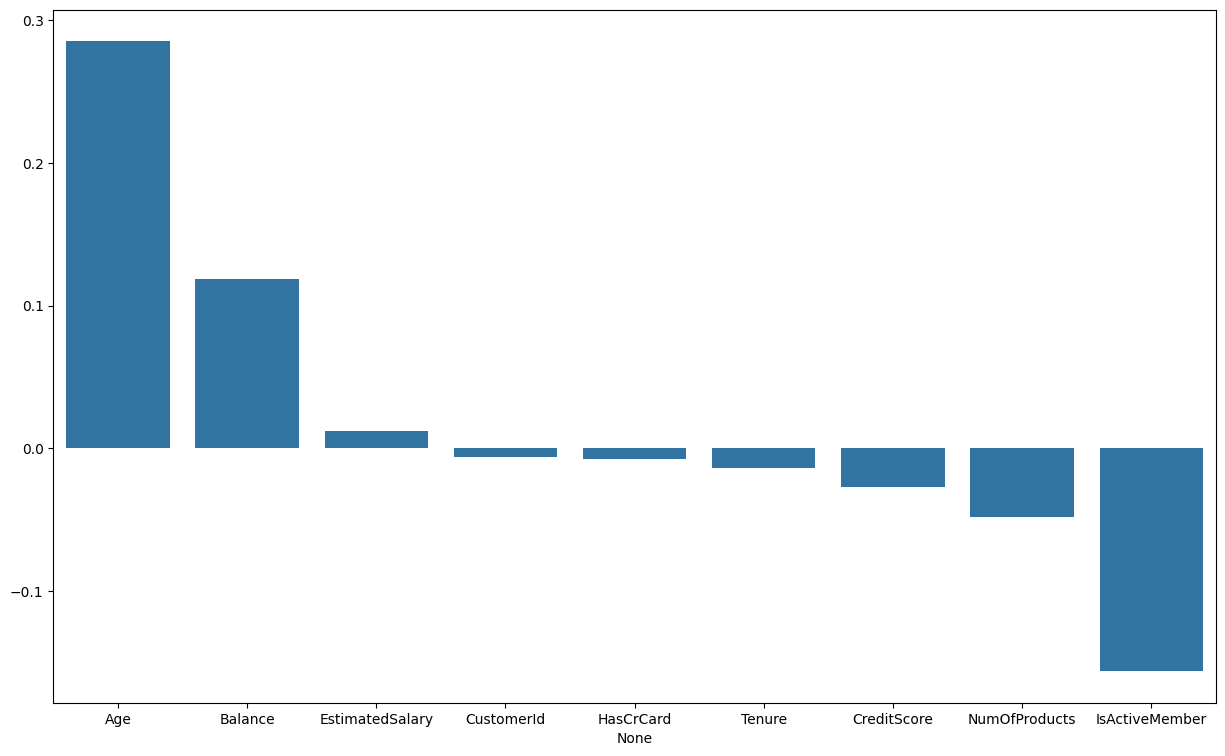

In [48]:
plt.figure(figsize=(15,9))
sns.barplot(x=features.index,y=features.values)
plt.show()


<Axes: xlabel='Exited', ylabel='count'>

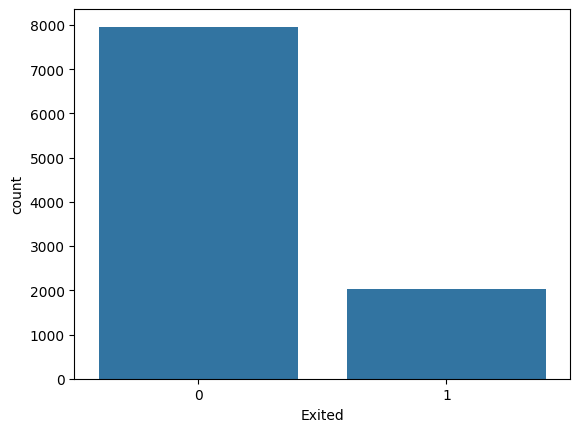

In [50]:
df['Exited'].value_counts()
sns.countplot(x='Exited',data=df)

<Axes: xlabel='Gender', ylabel='count'>

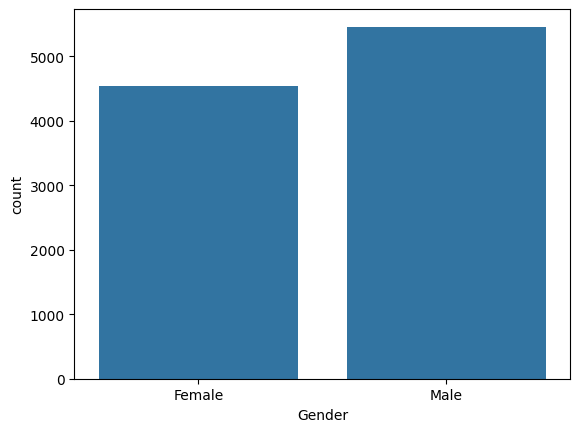

In [51]:
sns.countplot(x='Gender',data=df)

<Axes: xlabel='Tenure', ylabel='count'>

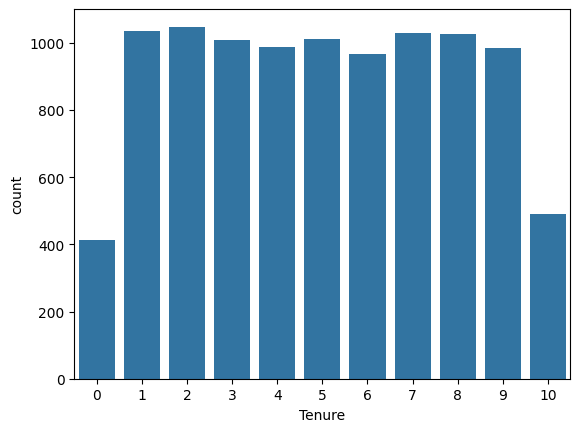

In [52]:
sns.countplot(x='Tenure',data=df)

<Axes: xlabel='NumOfProducts', ylabel='count'>

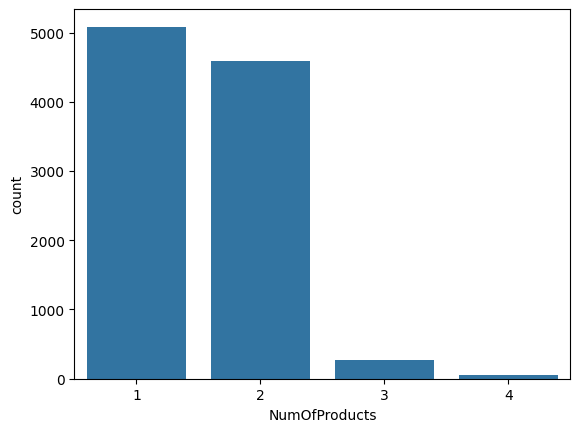

In [53]:
sns.countplot(x='NumOfProducts',data=df) # customers having less number of products are more likely to leave

<Axes: xlabel='HasCrCard', ylabel='count'>

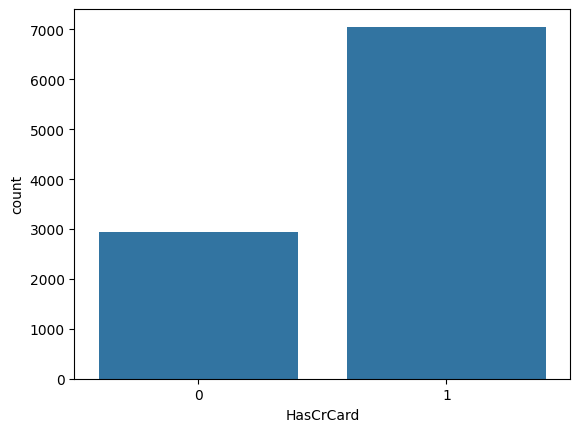

In [54]:
sns.countplot(x='HasCrCard',data=df) #70% have credit cards

# Finding Relations with output variable 

<Axes: xlabel='Exited', ylabel='count'>

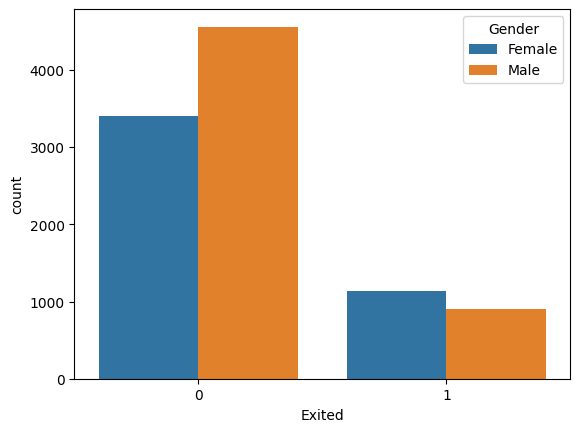

In [56]:
 sns.countplot(x='Exited',data=df,hue='Gender') # females leave more than males 

<Axes: xlabel='Exited', ylabel='count'>

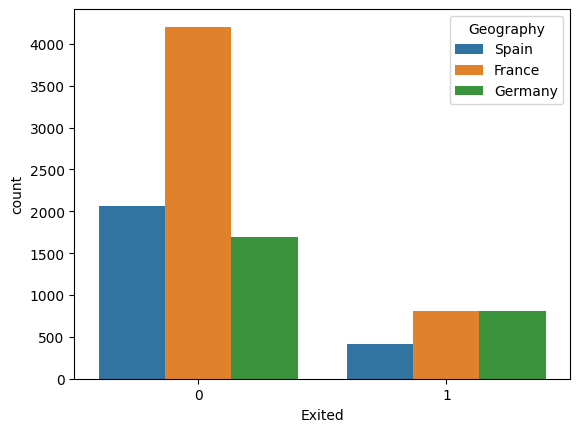

In [57]:
sns.countplot(x='Exited',data=df,hue='Geography') # not much related

<Axes: xlabel='Exited', ylabel='count'>

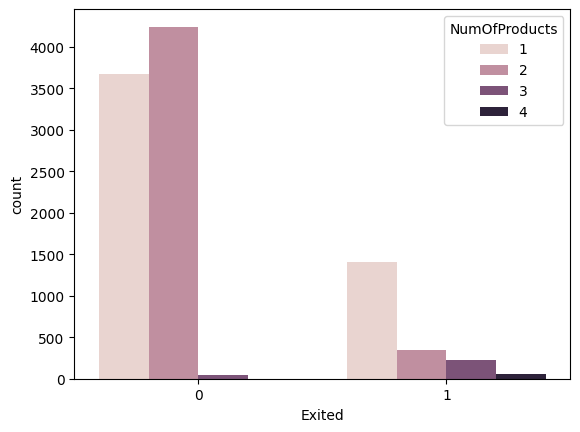

In [59]:
sns.countplot(x='Exited',data=df,hue='NumOfProducts')

C:\Users\mishr\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
C:\Users\mishr\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fu

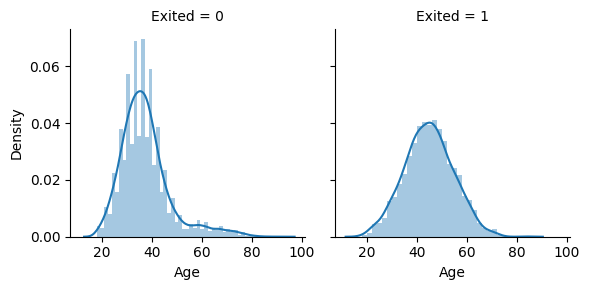

In [61]:
sns.FacetGrid(df,col='Exited')\
   .map(sns.distplot,"Age")

# Preprocessing

In [62]:
df.drop(columns=['CustomerId','Surname'],axis=1,inplace=True)

In [63]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [66]:
# encoding the non numeric values to numeric ones
df['Geography']=df['Geography'].astype('category').cat.codes # 0-germany 1-france 2- spain

In [67]:
df['Gender']=np.where(df['Gender']=='Male',1,0)

In [68]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [69]:
X=df.drop(columns=['Exited']).values
y=df['Exited']


In [70]:
X

array([[6.1900000e+02, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        1.0000000e+00, 1.0134888e+05],
       [6.0800000e+02, 2.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 1.1254258e+05],
       [5.0200000e+02, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 1.1393157e+05],
       ...,
       [7.0900000e+02, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 4.2085580e+04],
       [7.7200000e+02, 1.0000000e+00, 1.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 9.2888520e+04],
       [7.9200000e+02, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 3.8190780e+04]])

In [71]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [72]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [83]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, f1_score, confusion_matrix

In [79]:
basic_model=XGBClassifier()
basic_model.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [87]:
def evaluate_model(model):
    print("Training accuracy:",model.score(X_train,y_train))
    print("Testing accuray:",model.score(X_test,y_test))

    y_pred= model.predict(X_test)
    print(confusion_matrix(y_test,y_pred))
    print(classification_report(y_test,y_pred))     
    print("F1 score :", f1_score(y_test,y_pred))
    

In [88]:
evaluate_model(basic_model) 

Training accuracy: 0.9631428571428572
Testing accuray: 0.8593333333333333
[[2299  117]
 [ 305  279]]
              precision    recall  f1-score   support

           0       0.88      0.95      0.92      2416
           1       0.70      0.48      0.57       584

    accuracy                           0.86      3000
   macro avg       0.79      0.71      0.74      3000
weighted avg       0.85      0.86      0.85      3000

F1 score : 0.5693877551020409


In [ ]:
#f1 score and recall are less as the model was an imbalanced dataset. for that we can generate some synthetic data using the data we have already.

# Hyperparameter tuning of XGboost

In [89]:
from sklearn.model_selection import GridSearchCV


In [93]:
params={
    'n_estimators':[100,200],
'max_depth':[4,5]}

In [94]:
grid=GridSearchCV(estimator=XGBClassifier(),param_grid=params,scoring='accuracy',cv=5)
grid.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'max_depth': [4, 5], 'n_estimators': [100, 200]},
             scoring='accuracy')

In [96]:
grid.best_score_

np.float64(0.8517142857142858)

In [98]:
grid.best_params_

{'max_depth': 4, 'n_estimators': 100}

In [100]:
model_1=XGBClassifier(max_depth=4)
model_1.fit(X_train,y_train)
evaluate_model(model_1) 

Training accuracy: 0.9024285714285715
Testing accuray: 0.8726666666666667
[[2332   84]
 [ 298  286]]
              precision    recall  f1-score   support

           0       0.89      0.97      0.92      2416
           1       0.77      0.49      0.60       584

    accuracy                           0.87      3000
   macro avg       0.83      0.73      0.76      3000
weighted avg       0.86      0.87      0.86      3000

F1 score : 0.59958071278826


In [101]:
from sklearn.ensemble import GradientBoostingClassifier

In [104]:
model_2=GradientBoostingClassifier(n_estimators=500)
model_2.fit(X_train,y_train)
evaluate_model(model_2)

Training accuracy: 0.9055714285714286
Testing accuray: 0.8713333333333333
[[2319   97]
 [ 289  295]]
              precision    recall  f1-score   support

           0       0.89      0.96      0.92      2416
           1       0.75      0.51      0.60       584

    accuracy                           0.87      3000
   macro avg       0.82      0.73      0.76      3000
weighted avg       0.86      0.87      0.86      3000

F1 score : 0.6045081967213115


In [105]:
new_params = {
    'n_estimators': [100, 200],
    'max_depth': [4, 5],
    'learning_rate': [0.01, 0.05, 0.1],  # Adjust the learning rate
    'subsample': [0.7, 0.8, 1.0],         # Sample ratio of the training instance
    'colsample_bytree': [0.6, 0.8, 1.0],  # Sample ratio of features
    'gamma': [0, 0.1, 0.2],               # Minimum loss reduction to make a further partition
    'scale_pos_weight': [1, 2, 5],        # Balance the positive and negative weights
    'reg_alpha': [0, 0.1, 0.5],           # L1 regularization term
    'reg_lambda': [0, 0.1, 0.5],          # L2 regularization term
    'objective': ['binary:logistic'],     # Objective function for binary classification
    'eval_metric': ['logloss', 'auc']     # Evaluation metrics
}


In [108]:
from sklearn.model_selection import RandomizedSearchCV

In [110]:
random_search = RandomizedSearchCV(estimator=XGBClassifier(),
                                   param_distributions=new_params,
                                   n_iter=50,  # Number of random combinations to try
                                   scoring='roc_auc',  # Evaluation metric
                                   cv=5,  # Number of cross-validation folds
                                   verbose=1,
                                   random_state=42,
                                   n_jobs=-1) 

In [111]:
random_search.fit(X_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'eval_metric': ['logloss', 'auc'],
                                        'gamma': [0, 0.1, 0.2],
                                        'learning_rate': [0.01, 0.05, 0.1],
                                        'max_depth': [4, 5],
                                        'n_estimators': [100, 200],
                                        'objective': ['binary:logistic'],
                                        'reg_alpha': [0, 0.1, 0.5],
                                        'reg_lambda': [0, 0.1, 0.5],
                                        'scale_pos_weight': [1, 2, 5],
                                        'subsample': [0.7, 0.8, 1.0]},
                   random_state=42, scoring='roc_auc', verbose=1)

In [112]:
evaluate_model(random_search)

Training accuracy: 0.9093541011175104
Testing accuray: 0.865601327905289
[[2346   70]
 [ 311  273]]
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      2416
           1       0.80      0.47      0.59       584

    accuracy                           0.87      3000
   macro avg       0.84      0.72      0.76      3000
weighted avg       0.87      0.87      0.86      3000

F1 score : 0.5889967637540453


In [113]:
random_search.best_params_

{'subsample': 0.7,
 'scale_pos_weight': 1,
 'reg_lambda': 0,
 'reg_alpha': 0.1,
 'objective': 'binary:logistic',
 'n_estimators': 100,
 'max_depth': 5,
 'learning_rate': 0.05,
 'gamma': 0.1,
 'eval_metric': 'auc',
 'colsample_bytree': 0.8}

In [121]:
# using smote to create some synthetic data
import xgboost as xgb
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [125]:
y_resampled.value_counts()

Exited
1    5547
0    5547
Name: count, dtype: int64

In [126]:
random_search.fit(X_resampled,y_resampled)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


C:\Users\mishr\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'eval_metric': ['logloss', 'auc'],
                                        'gamma': [0, 0.1, 0.2],
                                        'learning_rate': [0.01, 0.05, 0.1],
                                        'max_depth': [4, 5],
                                        'n_estimators': [100, 200],
                                        'objective': ['binary:logistic'],
                                        'reg_alpha': [0, 0.1, 0.5],
                                        'reg_lambda': [0, 0.1, 0.5],
                                        'scale_pos_weight': [1, 2, 5],
                                        'subsample': [0.7, 0.8, 1.0]},
                   random_state=42, scoring='roc_auc', verbose=1)

In [127]:
evaluate_model(random_search)

Training accuracy: 0.9237017436308211
Testing accuray: 0.8680507518370679
[[2150  266]
 [ 195  389]]
              precision    recall  f1-score   support

           0       0.92      0.89      0.90      2416
           1       0.59      0.67      0.63       584

    accuracy                           0.85      3000
   macro avg       0.76      0.78      0.77      3000
weighted avg       0.85      0.85      0.85      3000

F1 score : 0.6279257465698144


In [128]:
import pickle

# Assuming xgb_model is your trained model
with open('your_model.pkl', 'wb') as file:
    pickle.dump(random_search, file)

# streamlit app for project

In [2]:
pip install streamlit 


  Using cached streamlit-1.38.0-py2.py3-none-any.whl.metadata (8.5 kB)
Using cached streamlit-1.38.0-py2.py3-none-any.whl (8.7 MB)


In [9]:
# Save Streamlit app to a file
app_code = """
import streamlit as st
import pandas as pd
import pickle

# Load your trained model
with open('your_model.pkl', 'rb') as file:
    model = pickle.load(file)

# Title of the app
st.title("Customer Churn Prediction")

# Input fields for user data
st.header("Input Customer Data")

# Input fields corresponding to your features
credit_score = st.number_input("Credit Score", min_value=300, max_value=850)
geography = st.selectbox("Geography", options=["France", "Spain", "Germany"])
gender = st.selectbox("Gender", options=["Male", "Female"])
age = st.number_input("Age", min_value=18, max_value=100)
tenure = st.number_input("Tenure (Years)", min_value=0, max_value=10)
balance = st.number_input("Balance", min_value=0.0)
num_of_products = st.number_input("Number of Products", min_value=1, max_value=4)
has_cr_card = st.number_input("Has Credit Card (1 for Yes, 0 for No)", min_value=0, max_value=1)
is_active_member = st.number_input("Is Active Member (1 for Yes, 0 for No)", min_value=0, max_value=1)
estimated_salary = st.number_input("Estimated Salary", min_value=0.0)

# Convert categorical inputs to numeric
geography_map = {"France": 1, "Spain": 2, "Germany": 0}
gender_map = {"Male": 1, "Female": 0}


# Create a DataFrame to hold the input data
input_data = pd.DataFrame({
    'CreditScore': [credit_score],
    'Geography': [geography_map[geography]],
    'Gender': [gender_map[gender]],
    'Age': [age],
    'Tenure': [tenure],
    'Balance': [balance],
    'NumOfProducts': [num_of_products],
    'HasCrCard': [has_cr_card_map[has_cr_card]],
    'IsActiveMember': [is_active_member_map[is_active_member]],
    'EstimatedSalary': [estimated_salary]
})

# Button to predict
if st.button("Predict"):
    prediction = model.predict(input_data)
    st.write("Churn Prediction (Exited):", prediction[0])
    if prediction[0] == 1:
        st.success("This customer is likely to churn.")
    else:
        st.success("This customer is likely to stay.")
"""

with open('app.py', 'w') as f:
    f.write(app_code)


In [10]:
!streamlit run app.py


^C
